In [1]:
import config
import spotipy
import json
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import requests  #don't know if its necessary

In [2]:
#Initialize SpotiPy with user credentials IMPORT FROM CONFIG.PY
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [3]:
AUTH_URL = 'https://accounts.spotify.com/api/token'  #In order to access the various endpoints of the Spotify API, we need to pass an access token.

In [4]:
# POST a request with our client credentials and save the appropriate part of the response
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': config.client_id,
    'client_secret': config.client_secret,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [5]:
access_token 

'BQAPq9T7QLsur7yVub22RMx809szMq-vHeKjZI8Z0Q4b2rO2nCyd4RMAGGFUV4BIT2-lvFGPB8NoghZrEyQ'

In [6]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [7]:
# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

In [8]:
df_line_up = pd.read_csv ('line_up_clean_id.csv')
len(df_line_up)

307

In [9]:
df_line_up

,Artist,Hour,stage,date,id
0,Amaarae,18:45 - 19:30,Cupra FKA Seat,02.06.22,21UPYSRWFKwtqvSAnFnSvS
1,Kehlani,20:40 - 21:40,Cupra FKA Seat,02.06.22,0cGUm45nv7Z6M6qdXYQGTX
2,Bad Gyal,23:20 - 00:20,Cupra FKA Seat,02.06.22,4F4pp8NUW08JuXwnoxglpN
3,Charli XCX,02:00 - 03:00,Cupra FKA Seat,02.06.22,25uiPmTg16RbhZWAqwLBy5
4,Verde Prato,18:00 - 18:40,Pull & Bear,02.06.22,04WGKyAt0klDPxUw2roFfi
...,...,...,...,...,...
302,Craig Richards,04:00 - 06:00,El Punto by adidas Originals (Primavera Bits),11.06.22,6EVc5gJQXiUl586m1NFCNH
303,Paranoid 1966,01:30 - 02:15,Lotus (Primavera Bits),11.06.22,6GP540ZTiOPTz8uI76k43u
304,Courtesy,02:40 - 03:55,Lotus (Primavera Bits),11.06.22,0osYTSrOpW6YESEC1lClwN
305,Acemoma,04:15 - 05:40,Lotus (Primavera Bits),11.06.22,5igyz9vWH6ban6NMfKeCir


In [10]:
ids_list =df_line_up['id'].tolist()

## Load all dataframes with audio features info

In [11]:
df1 = pd.read_csv ('df1.csv')
df1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_id
0,0.678333,0.599000,-7.700191,0.089061,0.342079,0.088620,0.180644,0.492207,119.078328,21UPYSRWFKwtqvSAnFnSvS
1,0.561209,0.598581,-6.391597,0.176166,0.315350,0.009152,0.189676,0.458883,115.725157,0cGUm45nv7Z6M6qdXYQGTX
2,0.719070,0.705698,-5.957047,0.100302,0.202536,0.009982,0.151965,0.523563,111.853209,4F4pp8NUW08JuXwnoxglpN
3,0.601695,0.801263,-4.458728,0.090438,0.087132,0.031706,0.194895,0.517288,125.943156,25uiPmTg16RbhZWAqwLBy5
4,0.475917,0.328667,-12.807417,0.052850,0.338917,0.371342,0.149608,0.199058,113.216417,04WGKyAt0klDPxUw2roFfi
5,0.600735,0.500949,-8.426812,0.084333,0.513363,0.001987,0.260992,0.498677,117.184581,70kkdajctXSbqSMJbQO424
6,0.432133,0.678769,-8.501723,0.055625,0.161730,0.274701,0.234053,0.431671,125.134124,3inCNiUr4R6XQ3W43s9Aqi
7,0.483176,0.775313,-5.815771,0.063370,0.158796,0.218904,0.236320,0.406772,128.493069,5INjqkS1o8h1imAzPqGZBb
8,0.638915,0.529534,-9.146503,0.113830,0.249500,0.083684,0.213367,0.436352,119.649357,5szilpXHcwOqnyKLqGco5j
9,0.514542,0.838750,-3.700000,0.060679,0.006859,0.059770,0.134083,0.646000,158.855000,13dTrWNNrnZ3AkgNyQNKP5


In [12]:
df2 = pd.read_csv ('df2.csv')

In [13]:
df = pd.concat([df1, df2], axis=0)

In [14]:
df3 = pd.read_csv ('df3.csv')

In [15]:
df4 = pd.read_csv ('df4.csv')

In [16]:
df5 = pd.read_csv ('df5.csv')

In [17]:
df6 = pd.read_csv ('df6.csv')

In [18]:
df7 = pd.read_csv ('df7.csv')

In [19]:
df8 = pd.read_csv ('df8.csv')

In [20]:
df9 = pd.read_csv ('df9.csv')

In [21]:
df10 = pd.read_csv ('df10.csv')

In [22]:
df11 = pd.read_csv ('df11.csv')

In [23]:
df12 = pd.read_csv ('df12.csv')

In [24]:
df13 = pd.read_csv ('df13.csv')

In [25]:
df14 = pd.read_csv ('df14.csv')

In [26]:
df15 = pd.read_csv ('df15.csv')

In [27]:
df16 = pd.read_csv ('df16.csv')

In [28]:
df17 = pd.read_csv ('df17.csv')

In [29]:
df18 = pd.read_csv ('df18.csv')

In [30]:
df19 = pd.read_csv ('df19.csv')

In [31]:
df20 = pd.read_csv ('df20.csv')

In [32]:
df21 = pd.read_csv ('df21.csv')

In [33]:
df22 = pd.read_csv ('df22.csv')

In [34]:
df23 = pd.read_csv ('df23.csv')

In [35]:
df24 = pd.read_csv ('df24.csv')

In [36]:
df25 = pd.read_csv ('df25.csv')

In [37]:
df26 = pd.read_csv ('df26.csv')

In [38]:
df27 = pd.read_csv ('df27.csv')

In [39]:
df28 = pd.read_csv ('df28.csv')

In [40]:
df29 = pd.read_csv ('df29.csv')

In [41]:
features_df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29], axis=0)

In [42]:
#pd.set_option('display.max_rows', 319) 
features_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_id
0,0.678333,0.599000,-7.700191,0.089061,0.342079,0.088620,0.180644,0.492207,119.078328,21UPYSRWFKwtqvSAnFnSvS
1,0.561209,0.598581,-6.391597,0.176166,0.315350,0.009152,0.189676,0.458883,115.725157,0cGUm45nv7Z6M6qdXYQGTX
2,0.719070,0.705698,-5.957047,0.100302,0.202536,0.009982,0.151965,0.523563,111.853209,4F4pp8NUW08JuXwnoxglpN
3,0.601695,0.801263,-4.458728,0.090438,0.087132,0.031706,0.194895,0.517288,125.943156,25uiPmTg16RbhZWAqwLBy5
4,0.475917,0.328667,-12.807417,0.052850,0.338917,0.371342,0.149608,0.199058,113.216417,04WGKyAt0klDPxUw2roFfi


In [43]:
features_df = features_df.reset_index(drop=True)

In [44]:
df_line_up.head()

,Artist,Hour,stage,date,id
0,Amaarae,18:45 - 19:30,Cupra FKA Seat,02.06.22,21UPYSRWFKwtqvSAnFnSvS
1,Kehlani,20:40 - 21:40,Cupra FKA Seat,02.06.22,0cGUm45nv7Z6M6qdXYQGTX
2,Bad Gyal,23:20 - 00:20,Cupra FKA Seat,02.06.22,4F4pp8NUW08JuXwnoxglpN
3,Charli XCX,02:00 - 03:00,Cupra FKA Seat,02.06.22,25uiPmTg16RbhZWAqwLBy5
4,Verde Prato,18:00 - 18:40,Pull & Bear,02.06.22,04WGKyAt0klDPxUw2roFfi


In [45]:
df_line_up = df_line_up.reset_index(drop=True)

In [46]:
features_df.shape

(307, 10)

In [47]:
df_line_up.shape

(307, 5)

## Concatenate df with audio features and df with line-up info

### Set Ids as index before concatenate

In [48]:
#features_df = features_df.set_index('artist_id')

In [49]:
df_line_up.rename(columns = {'id':'artist_id'}, inplace = True)

In [50]:
df_line_up.index.nunique()

307

In [51]:
features_df.shape

(307, 10)

In [52]:
features_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_id
0,0.678333,0.599000,-7.700191,0.089061,0.342079,0.088620,0.180644,0.492207,119.078328,21UPYSRWFKwtqvSAnFnSvS
1,0.561209,0.598581,-6.391597,0.176166,0.315350,0.009152,0.189676,0.458883,115.725157,0cGUm45nv7Z6M6qdXYQGTX
2,0.719070,0.705698,-5.957047,0.100302,0.202536,0.009982,0.151965,0.523563,111.853209,4F4pp8NUW08JuXwnoxglpN
3,0.601695,0.801263,-4.458728,0.090438,0.087132,0.031706,0.194895,0.517288,125.943156,25uiPmTg16RbhZWAqwLBy5
4,0.475917,0.328667,-12.807417,0.052850,0.338917,0.371342,0.149608,0.199058,113.216417,04WGKyAt0klDPxUw2roFfi


In [53]:
df_line_up.shape

(307, 5)

In [54]:
df_line_up.head()

,Artist,Hour,stage,date,artist_id
0,Amaarae,18:45 - 19:30,Cupra FKA Seat,02.06.22,21UPYSRWFKwtqvSAnFnSvS
1,Kehlani,20:40 - 21:40,Cupra FKA Seat,02.06.22,0cGUm45nv7Z6M6qdXYQGTX
2,Bad Gyal,23:20 - 00:20,Cupra FKA Seat,02.06.22,4F4pp8NUW08JuXwnoxglpN
3,Charli XCX,02:00 - 03:00,Cupra FKA Seat,02.06.22,25uiPmTg16RbhZWAqwLBy5
4,Verde Prato,18:00 - 18:40,Pull & Bear,02.06.22,04WGKyAt0klDPxUw2roFfi


### Concatenate

In [55]:
df_all = pd.concat([df_line_up, features_df], axis=1)
df_all.head()

,Artist,Hour,stage,date,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_id
0,Amaarae,18:45 - 19:30,Cupra FKA Seat,02.06.22,21UPYSRWFKwtqvSAnFnSvS,0.678333,0.599000,-7.700191,0.089061,0.342079,0.088620,0.180644,0.492207,119.078328,21UPYSRWFKwtqvSAnFnSvS
1,Kehlani,20:40 - 21:40,Cupra FKA Seat,02.06.22,0cGUm45nv7Z6M6qdXYQGTX,0.561209,0.598581,-6.391597,0.176166,0.315350,0.009152,0.189676,0.458883,115.725157,0cGUm45nv7Z6M6qdXYQGTX
2,Bad Gyal,23:20 - 00:20,Cupra FKA Seat,02.06.22,4F4pp8NUW08JuXwnoxglpN,0.719070,0.705698,-5.957047,0.100302,0.202536,0.009982,0.151965,0.523563,111.853209,4F4pp8NUW08JuXwnoxglpN
3,Charli XCX,02:00 - 03:00,Cupra FKA Seat,02.06.22,25uiPmTg16RbhZWAqwLBy5,0.601695,0.801263,-4.458728,0.090438,0.087132,0.031706,0.194895,0.517288,125.943156,25uiPmTg16RbhZWAqwLBy5
4,Verde Prato,18:00 - 18:40,Pull & Bear,02.06.22,04WGKyAt0klDPxUw2roFfi,0.475917,0.328667,-12.807417,0.052850,0.338917,0.371342,0.149608,0.199058,113.216417,04WGKyAt0klDPxUw2roFfi


In [56]:
df_all['artist_id'].equals(df_all[:-1])

False

In [57]:
df_all = df_all.iloc[:, :-1]

In [58]:
df_all.head()

,Artist,Hour,stage,date,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Amaarae,18:45 - 19:30,Cupra FKA Seat,02.06.22,21UPYSRWFKwtqvSAnFnSvS,0.678333,0.599000,-7.700191,0.089061,0.342079,0.088620,0.180644,0.492207,119.078328
1,Kehlani,20:40 - 21:40,Cupra FKA Seat,02.06.22,0cGUm45nv7Z6M6qdXYQGTX,0.561209,0.598581,-6.391597,0.176166,0.315350,0.009152,0.189676,0.458883,115.725157
2,Bad Gyal,23:20 - 00:20,Cupra FKA Seat,02.06.22,4F4pp8NUW08JuXwnoxglpN,0.719070,0.705698,-5.957047,0.100302,0.202536,0.009982,0.151965,0.523563,111.853209
3,Charli XCX,02:00 - 03:00,Cupra FKA Seat,02.06.22,25uiPmTg16RbhZWAqwLBy5,0.601695,0.801263,-4.458728,0.090438,0.087132,0.031706,0.194895,0.517288,125.943156
4,Verde Prato,18:00 - 18:40,Pull & Bear,02.06.22,04WGKyAt0klDPxUw2roFfi,0.475917,0.328667,-12.807417,0.052850,0.338917,0.371342,0.149608,0.199058,113.216417


In [59]:
df_all.to_csv('df_all.csv')
features_df.to_csv('features_df.csv')

## EDA

### Date

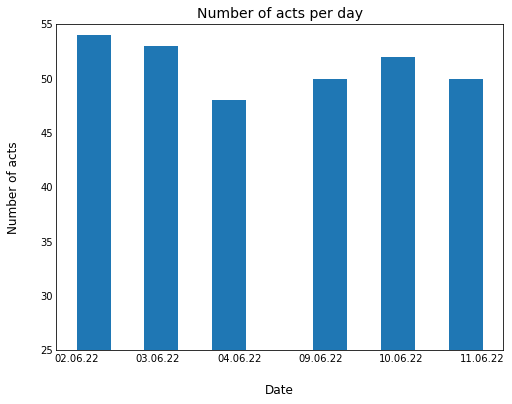

In [60]:
h = df_all['date'].hist(figsize=(8, 6), bins = 12, grid = False)
h.set_title("Number of acts per day", size=14)
h.set_ylabel("Number of acts", labelpad=20, size=12)
h.set_xlabel("Date", labelpad=20, size=12)
h.tick_params(axis=u'both', which=u'both',length=0)
plt.ylim([25, 55])
plt.show()
#plt.savefig('acts_day.jpg')

### Stages

In [61]:
df_all['stage'].unique()

array(['Cupra FKA Seat', 'Pull & Bear', 'Dice FKA Ray-Ban', 'Primavera',
       'Pitchfork', 'Adidas', 'Auditori', 'NTS Warehouse',
       'Desperados Cube (Primavera Bits)',
       'El Punto by adidas Originals (Primavera Bits)',
       'Lotus (Primavera Bits)', 'Xiringuito Aperol (Primavera Bits)',
       'Escenario Ouigo'], dtype=object)

In [62]:
df_all.groupby(['stage']).mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
stage,,,,,,,,,
Adidas,0.483207,0.709844,-7.236501,0.086750,0.196029,0.223326,0.214629,0.427263,126.927134
Auditori,0.494919,0.532226,-10.262613,0.086565,0.381098,0.337190,0.186454,0.335470,118.212942
Cupra FKA Seat,0.620440,0.623774,-7.589993,0.119238,0.285839,0.097809,0.189257,0.467511,118.448654
Desperados Cube (Primavera Bits),0.631173,0.677202,-10.230216,0.090568,0.182707,0.563304,0.172202,0.389475,126.506932
Dice FKA Ray-Ban,0.558361,0.645645,-8.069400,0.086414,0.254518,0.215233,0.197967,0.435698,122.310966
El Punto by adidas Originals (Primavera Bits),0.639411,0.742832,-8.769414,0.095225,0.115672,0.520111,0.198927,0.403896,127.118060
Escenario Ouigo,0.513329,0.491979,-13.613521,0.066254,0.294713,0.360343,0.166796,0.351944,116.932917
Lotus (Primavera Bits),0.577916,0.642784,-10.293656,0.092601,0.238569,0.515439,0.176622,0.372194,124.303449
NTS Warehouse,0.679221,0.561696,-10.948650,0.160653,0.408290,0.384699,0.165106,0.438971,122.062868


<AxesSubplot:title={'center':'Danceability by Stage'}, xlabel='Stage', ylabel='Danceability'>

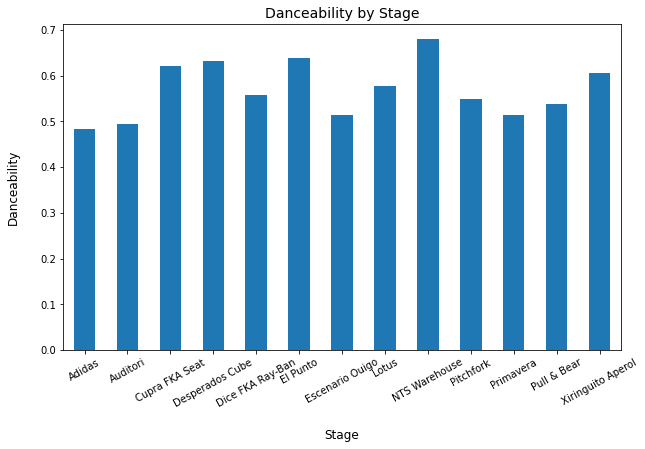

In [63]:
stages = df_all.groupby(['stage'])['danceability'].mean()
ax = stages.plot(kind='bar',figsize=(10, 6))

ax.set_title("Danceability by Stage", size=14)
ax.set_ylabel("Danceability", labelpad=20, size=12)
ax.set_xlabel("Stage", labelpad=20, size=12)
ax.set_xticklabels(["Adidas","Auditori","Cupra FKA Seat","Desperados Cube","Dice FKA Ray-Ban", "El Punto", "Escenario Ouigo","Lotus","NTS Warehouse" , "Pitchfork", "Primavera", "Pull & Bear", "Xiringuito Aperol"],rotation = 29)
display(ax)
plt.savefig('stage_danceability.jpg')

In [64]:
df_all.groupby(['stage']).count().sort_values(['Artist'], ascending=[False])

,Artist,Hour,date,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
stage,,,,,,,,,,,,,
Adidas,41,41,41,41,41,41,41,41,41,41,41,41,41
Pitchfork,41,41,41,41,41,41,41,41,41,41,41,41,41
Dice FKA Ray-Ban,38,38,38,38,38,38,38,38,38,38,38,38,38
Desperados Cube (Primavera Bits),30,30,30,30,30,30,30,30,30,30,30,30,30
Primavera,30,30,30,30,30,30,30,30,30,30,30,30,30
Lotus (Primavera Bits),26,26,26,26,26,26,26,26,26,26,26,26,26
Cupra FKA Seat,24,24,24,24,24,24,24,24,24,24,24,24,24
Pull & Bear,24,24,24,24,24,24,24,24,24,24,24,24,24
Auditori,22,22,22,22,22,22,22,22,22,22,22,22,22


In [65]:
df_all.groupby(['date','stage']).count()

Artist  Hour  artist_id  \
date     stage                                                         
02.06.22 Adidas                                   7     7          7   
         Auditori                                 4     4          4   
         Cupra FKA Seat                           4     4          4   
         Desperados Cube (Primavera Bits)         5     5          5   
         Dice FKA Ray-Ban                         7     7          7   
...                                             ...   ...        ...   
11.06.22 Lotus (Primavera Bits)                   3     3          3   
         Pitchfork                                7     7          7   
         Primavera                                5     5          5   
         Pull & Bear                              4     4          4   
         Xiringuito Aperol (Primavera Bits)       1     1          1   

                                             danceability  energy  loudness  \
date     stage                                                                
02.06.22 Adidas                                         7       7         7   
         Auditori                                       4       4         4   
         Cupra FKA Seat                                 4       4         4   
         Desperados Cube (Primavera Bits)               5       5         5   
         Dice FKA Ray-Ban                               7       7         7   
...                                                   ...     ...       ...   
11.06.22 Lotus (Primavera Bits)                         3       3         3   
         Pitchfork                                      7       7         7   
         Primavera                                      5       5         5   
         Pull & Bear                                    4       4         4   
         Xiringuito Aperol (Primavera Bits)             1       1         1   

                                             speechiness  acousticness  \
date     stage                                                           
02.06.22 Adidas                                        7             7   
         Auditori                                      4             4   
         Cupra FKA Seat                                4             4   
         Desperados Cube (Primavera Bits)              5             5   
         Dice FKA Ray-Ban                              7             7   
...                                                  ...           ...   
11.06.22 Lotus (Primavera Bits)                        3             3   
         Pitchfork                                     7             7   
         Primavera                                     5             5   
         Pull & Bear                                   4             4   
         Xiringuito Aperol (Primavera Bits)            1             1   

                                             instrumentalness  liveness  \
date     stage                                                            
02.06.22 Adidas                                             7         7   
         Auditori                                           4         4   
         Cupra FKA Seat                                     4         4   
         Desperados Cube (Primavera Bits)                   5         5   
         Dice FKA Ray-Ban                                   7         7   
...                                                       ...       ...   
11.06.22 Lotus (Primavera Bits)                             3         3   
         Pitchfork                                          7         7   
         Primavera                                          5         5   
         Pull & Bear                                        4         4   
         Xiringuito Aperol (Primavera Bits)                 1         1   

                                             valence  tempo  
date     stage                                               
02.06.22 Adidas  